## 图像分割-二值化

这一节主要讲图像分割，这里的分割指取一个阀值，大于阀值，则为最高亮度，低于阀值，设为最低亮度，达到把图像分割出来的效果。对于某些背景和前景亮度差别很大的图像是很有效果的，可以把前景和背景分离出来。

首先是叫大津法，这个是求一个阀值来分割，然后使分割后图像灰度方差最大。

OTSU算法的假设是存在阈值TH将图像所有像素分为两类C1(小于TH)和C2(大于TH)，则这两类像素各自的均值就为m1、m2，图像全局均值为mG。同时像素被分为C1和C2类的概率分别为p1、p2。因此就有：

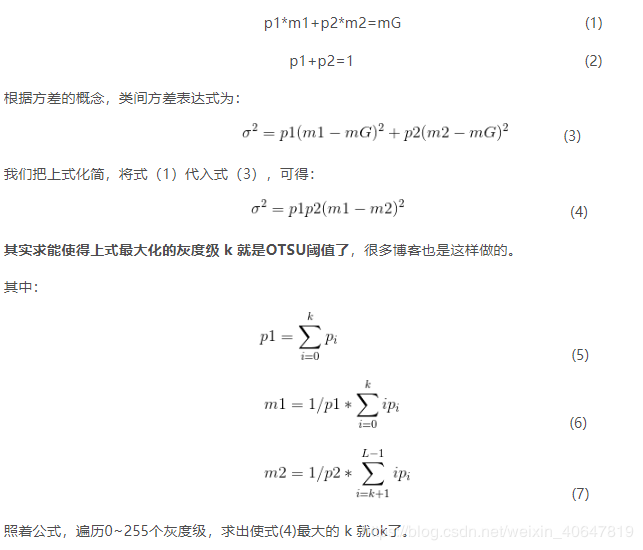

这里需要遍历0-255个灰度值，以求该阀值下整个图像灰度最大

### opencv的调用

In [13]:
# 二值分割
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [14]:
img=cv.imread('E:/Machine Learning/OpenCV/task3/task3.jpg',0)
#自己设置分割阀值
ret, binary =  cv.threshold(img, 80, 255, cv.THRESH_BINARY)
#自适应阀值
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
#自适应高斯阀值
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
# Otsu's thresholding
#大津法
ret2,th4 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering，高斯过滤后大津法
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th5 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)


cv.imshow('img',img)
cv.imshow('binary',binary)
cv.imshow('ADAPTIVE_THRESH_MEAN',th2)
cv.imshow('ADAPTIVE_THRESH_GAUSSIAN_C',th3)
cv.imshow('OTSU',th4)
cv.imshow('Gaussian-OTSU',th5)
cv.waitKey(0)
cv.destroyAllWindows()


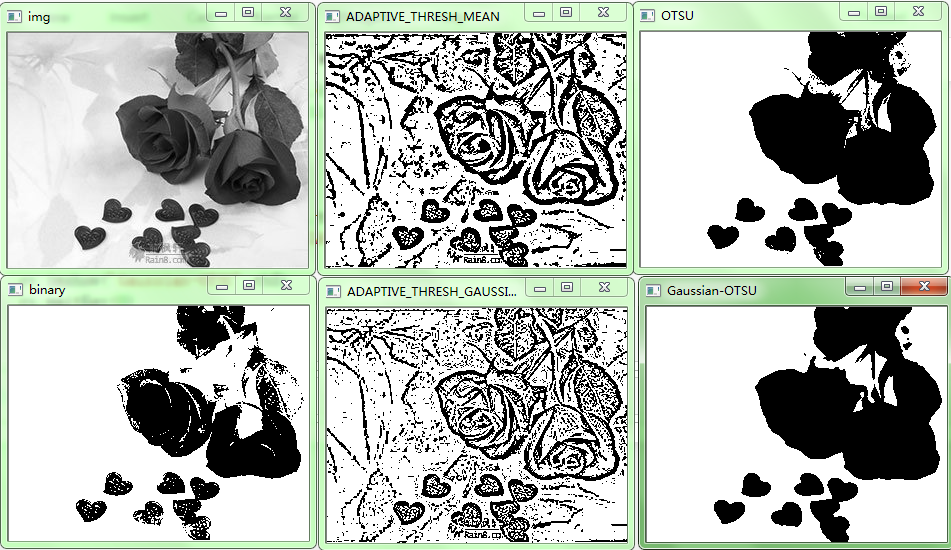